# Demo Regresion Lineal

Benjamin Gutierrez bencouver@gmail.com

Contents:
- Ingestion y exploracion visual de los datos sobre las ganancias de un camion de comida
- Funcion de costo
- Modelo (optimizacion por descenso de gradiente)

Paquetes empleados:  
`Pandas` para leer archivos tipo csv y aliemtarlos a dataframes  
`Numpy` arreglos, matrices y operaciones matematicas entre ellos

`Matplotlib` para graficar

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline


## Ingestion de Datos

Los datos contienen dos columnas, la polacion de la ciudad (en miles) y las ganancias (en 10K tambien)

In [27]:
data = pd.read_csv('ex1data1.txt', names = ['poblacion', 'ganancia'])

In [28]:
print data.head()

   poblacion  ganancia
0     6.1101   17.5920
1     5.5277    9.1302
2     8.5186   13.6620
3     7.0032   11.8540
4     5.8598    6.8233


## Grafica de los datos

In [32]:
## Divide la poblacion y ganancias en X y y dataframes
X_df = pd.DataFrame(data.poblacion)
y_df = pd.DataFrame(data.ganancia)

## Numero de observaciones en nuestros datos
m = len(y_df)

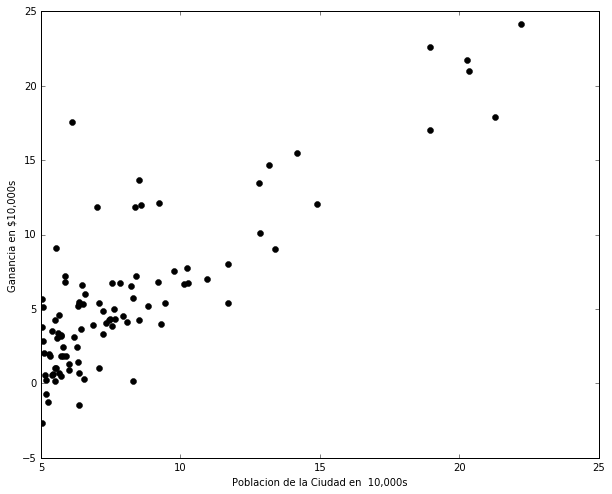

In [33]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df,'ko')  #kx,kv,k.,ko porque son dataframes y no np arrays
plt.xlabel('Poblacion de la Ciudad en  10,000s')
plt.ylabel('Ganancia en $10,000s')


Vamos a elaborar un modelo   para encontrar la relacion entre la variable dependiente (y) and 
y un conjunto de variables independientes  ($x_1, x_2...$). Esta relacion es nuestro modelo 
predictivo basado en los parametros  $\theta_0, \theta_1$ del a forma: $y = \theta_0 + \theta_1x$, donde $\theta_0$
    es nuestra ordenada al origen (intercept).

Como encontramos el mejor modelo de los muchos que pueden existir?

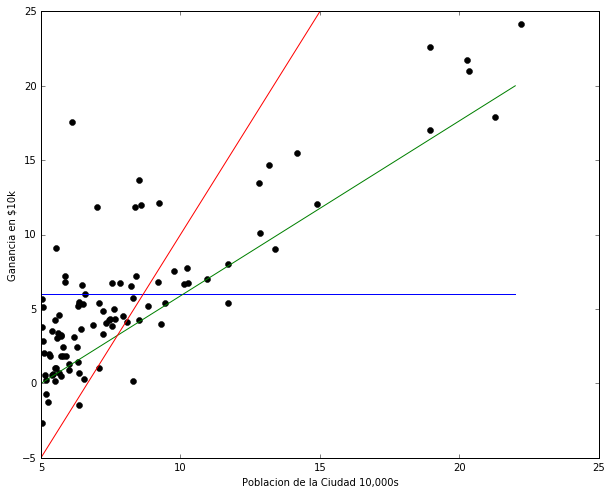

In [35]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'ko')
plt.plot([5, 22], [6,6], '-')
plt.plot([5, 22], [0,20], '-')
plt.plot([5, 15], [-5,25], '-')
plt.xlabel('Poblacion de la Ciudad 10,000s')
plt.ylabel('Ganancia en $10k')

## Funcion de Costo

Funcion de costo a minimizar: (simple funcion cuadratica)
$$J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$

Hipotesis de nuestro modelo lineal:
$$h_\theta(x) = \theta^{T}x = \theta_0 + \theta_1x_1$$

Buscamos $\theta_j$ para minimizar $J(\theta)$.  Cada iteracion calcula la actualizacion de parametros pro medio de la siguiente expresion:
$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_{j}^{(i)}$$

In [36]:
x_quad = [float(n)/10.0 for n in range(0, 100)]
x_quad;
y_quad = [(n-4)**2+5 for n in x_quad]

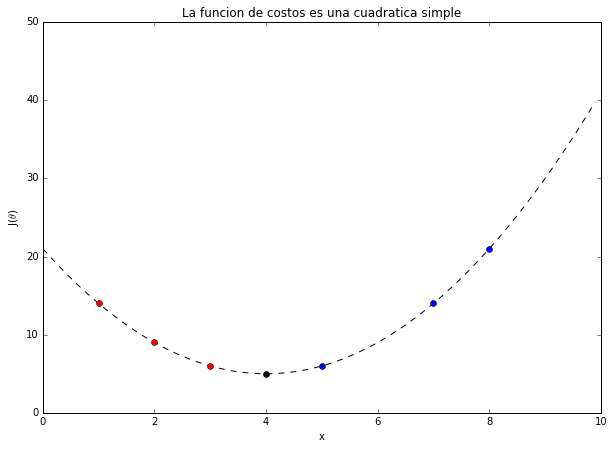

In [37]:

plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,50])
plt.plot([1, 2, 3], [14, 9, 6], 'ro')
plt.plot([5, 7, 8],[6, 14, 21], 'bo')
plt.plot(4,5, 'ko')
plt.xlabel('x')
plt.ylabel("J($\\theta$)")
plt.title('La funcion de costos es una cuadratica simple')

In [38]:
iterations = 1500 #asumimos convergencia
alpha = 0.01   #Ritmo de aprendizaje

In [39]:
## Agregamos una columna de unos porque no existe x_o para la ordenada al origen
X_df['intercept'] = 1

## Construimos una matrix para X
X = np.array(X_df)
y = np.array(y_df).flatten()  #flatten concatena arrays de arrays en uno solo continuo, chk zip
theta = np.array([0, 0]) #vector inicializado con ceros

In [11]:
def cost_function(X, y, theta):
    """
    Funcion de costo
    """
    ## Numero de puntos en el dataset
    m = len(y) 
    
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

In [12]:
cost_function(X, y, theta)

32.072733877455676

In [13]:
def gradient_descent(X, y, theta, alpha, iterations):
    
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m  #Transpose
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history
     

In [14]:
(t, c) = gradient_descent(X,y,theta,alpha, iterations)

In [15]:
## Print parameters of the model theta_1,theta_0
print t

[ 1.16636235 -3.63029144]


In [16]:
## Ejemplo de prediccion en dos puntos x=3.5 y x=7, 
print np.array([3.5, 1]).dot(t)
print np.array([7, 1]).dot(t)

0.45197678677
4.53424501294


In [17]:
## Plotting the best fit line
h_x = np.linspace(0, 25, 20) #entre 0 y 25 quiero 20 puntos regularmente espaciados
h_y = [t[1] + t[0]*xx for xx in h_x]

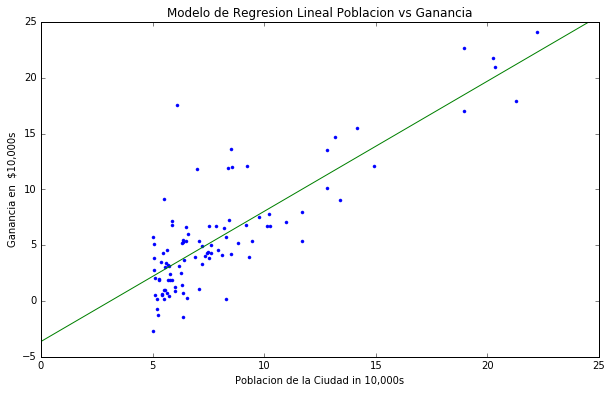

In [18]:
plt.figure(figsize=(10,6))
plt.plot(X_df.poblacion, y_df, '.')
plt.plot(h_x, h_y, '-')
plt.axis([0,25,-5,25])
plt.xlabel('Poblacion de la Ciudad in 10,000s')
plt.ylabel('Ganancia en  $10,000s')
plt.title('Modelo de Regresion Lineal Poblacion vs Ganancia')